## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### Start with a very simple line plot with just y axis values

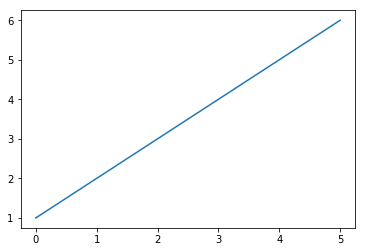

In [33]:
plt.plot([1,2,3,4,5,6])
plt.show();

### Add an x axis explicitly

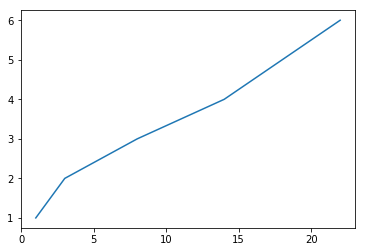

In [34]:
plt.plot([1, 3, 8, 14, 18, 22],[1, 2, 3, 4,5,6])
plt.show;

## Let's plot a real dataset

### Read our dataset

In [35]:
sales = pd.read_csv('vgsales.csv')
sales.shape
sales.head()

(16598, 11)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Get values for x and y axis

In [36]:
rank = sales.Rank[0:10]
gsales = sales.Global_Sales[0:10]

### Plot Game Rank and Game Global Sales for top ten game titles

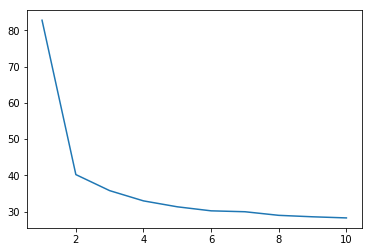

In [37]:
plt.plot(rank,gsales)
plt.show;

## Changing the plot properties

### Add labels to x and y axis

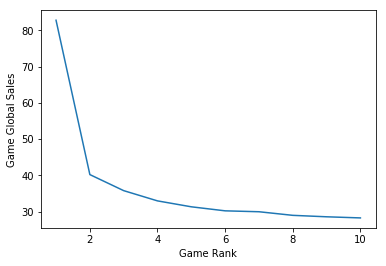

In [38]:
plt.plot(rank,gsales)
plt.xlabel('Game Rank')
plt.ylabel('Game Global Sales')
plt.show;

### Add a title to the plot

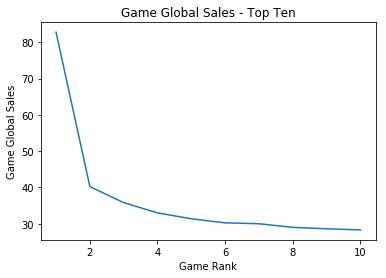

In [39]:
plt.plot(rank,gsales)
plt.xlabel('Game Rank')
plt.ylabel('Game Global Sales')
plt.title('Game Global Sales - Top Ten')
plt.show;

### Add a legend

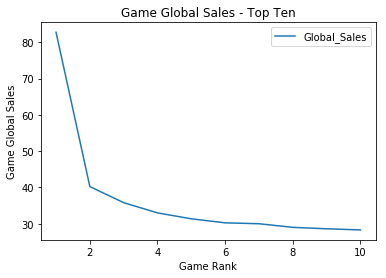

In [40]:
plt.plot(rank,gsales)
plt.xlabel('Game Rank')
plt.ylabel('Game Global Sales')
plt.title('Game Global Sales - Top Ten')
plt.legend()
plt.show;

### Changing line properties

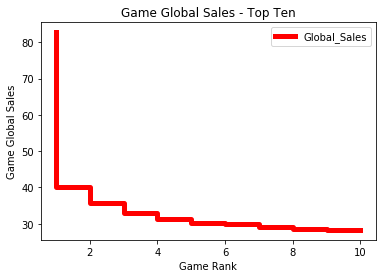

In [41]:
plt.plot(rank,gsales, color='red', linewidth=5, linestyle='steps')
plt.xlabel('Game Rank')
plt.ylabel('Game Global Sales')
plt.title('Game Global Sales - Top Ten')
plt.legend()
plt.show;

### Modifying plot display area

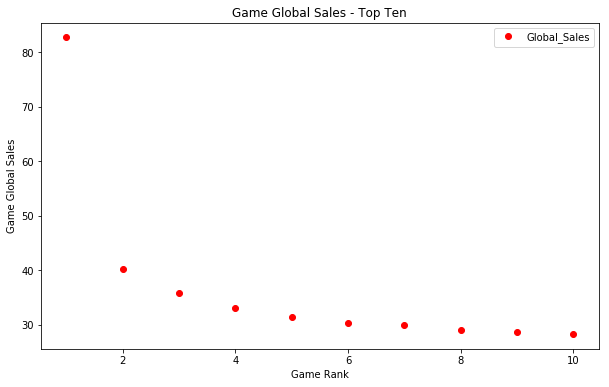

In [42]:
plt.figure(figsize=(10,6))
plt.plot(rank,gsales, 'ro')
plt.xlabel('Game Rank')
plt.ylabel('Game Global Sales')
plt.title('Game Global Sales - Top Ten')
plt.legend()
plt.show;

## A basic bar plot

### Prepare the data - Sales by Year

In [ ]:
yearly_sales = pd.DataFrame({'total_global_sales' : sales.groupby( [ "Year"] )['Global_Sales'].
                             sum()}).reset_index().set_index(['Year'])
yearly_sales.head()

### Plot the bar plot

In [ ]:
plt.figure(figsize=(12,5));
chart = yearly_sales.total_global_sales.plot(kind='bar');

## Let's Customize our bar plot

### Change the color of the bars

In [ ]:
plt.figure(figsize=(12,5));
chart = yearly_sales.total_global_sales.plot(kind='bar',facecolor='#AA0000');

### Add a title and axis labels

In [ ]:
plt.figure(figsize=(12,5));
chart = yearly_sales.total_global_sales.plot(kind='bar',facecolor='#AA0000',
                                             title='Global Sales by year');
chart.set_xlabel("Year", fontsize=12);
chart.set_ylabel("Global Sales", fontsize=12);

## Applying same template to other columns

### Sales by Platform - Data

In [ ]:
platform_sales = pd.DataFrame({'total_global_sales' : sales.groupby( [ "Platform"] )['Global_Sales'].
                               sum()}).reset_index().set_index(['Platform'])
platform_sales.head()

### Sales by Platform - Bar plot

In [ ]:
plt.figure(figsize=(12,5));
chart = platform_sales.total_global_sales.plot(kind='bar',facecolor='#AA0000', title='Global Sales by Platform');
chart.set_xlabel("Platform", fontsize=12);
chart.set_ylabel("Global Sales", fontsize=12);

### Let's sort it

In [ ]:
platform_sales_sorted = platform_sales.sort_values('total_global_sales', ascending=False)
plt.figure(figsize=(12,5));
chart = platform_sales_sorted.total_global_sales.plot(kind='bar',facecolor='#AA0000', title='Global Sales by Platform');
chart.set_xlabel("Platform", fontsize=12);
chart.set_ylabel("Global Sales", fontsize=12);

## Making a stacked bar plot

### Data - Regional sales, grouped by Genre 

In [ ]:
genre = sales[[ "Genre", 'NA_Sales','EU_Sales','JP_Sales']].groupby(['Genre'], as_index=False).sum()
genre

### Drawing the stacked plot

In [ ]:
f, ax = plt.subplots(1, figsize=(12,5))
bar_l = [i+1 for i in range(len(genre['NA_Sales']))]
ax.bar(bar_l, genre['NA_Sales'], label='NA', color='red')
ax.bar(bar_l, genre['EU_Sales'], bottom=genre['NA_Sales'], label='EU',color='blue')
ax.bar(bar_l, genre['JP_Sales'], bottom=[i+j for i,j in zip(genre['NA_Sales'],genre['EU_Sales'])], label='Japan',color='green')
ax.set_title("Sales by Genre and Region")
ax.set_xlabel("Genre");
ax.set_ylabel("Sales");
plt.legend(loc='upper right');

# Demo End

# Making histograms - Demo

## Recall our dataset

In [ ]:
sales.head()

## Encode a categorical column for plotting

In [ ]:
sales['Genre'].unique()
sales['genre_enc'] = pd.factorize(sales['Genre'])[0]
sales['genre_enc'].unique()

## Making a basic histogram plot

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(sales.genre_enc);

### Let's customize 

In [ ]:
plt.figure(figsize=(12,6));
plt.hist(sales.genre_enc, color = '#539caf');
plt.title("Games Titles by Genre");
plt.xlabel("Genre");
plt.ylabel("# of Game Titles");
plt.show();

### Making subplots

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat
ax0.hist(sales["NA_Sales"])
ax0.set_title('NA_Sales')
ax1.hist(sales["EU_Sales"])
ax1.set_title('EU_Sales')
ax2.hist(sales["JP_Sales"])
ax2.set_title('JP_Sales')
ax3.hist(sales["Global_Sales"])
ax3.set_title('Global_Sales')
plt.tight_layout()
plt.show();

# Demo End

# Drawing box plots - Demo

## Dataset

In [ ]:
sales.head()

## Let's make a Box plot

#### Sales by Region

In [ ]:
sales_by_region = [sales[:100]['NA_Sales'], sales[:100]['EU_Sales'], sales[:100]['JP_Sales'], sales[:100]['Global_Sales']]
sales_by_region

In [ ]:
plt.figure(1, figsize=(12, 6))
plt.boxplot(sales_by_region)
plt.show;

# Demo End

# Drawing some other kinds of plots with matplotlib - Demo

## Scatter plots

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(sales.Year, sales.Global_Sales)
plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show();

## Pie charts

In [ ]:
genre['NA_Sales']
plt.pie(genre['NA_Sales'])
plt.show();

### Saving the plot

In [ ]:
plt.savefig("foo.png")

# Demo End